<a href="https://colab.research.google.com/github/Ghofranee1/handwritten-digit-recognition/blob/main/Handwritten_Digit_Recognition(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 🚀 Handwritten Digit Recognition with TensorFlow
# Author: [Ghofrane Lakhal]

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Step 2: Load the dataset (MNIST)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize (scale values between 0 and 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [20]:
# Step 3: Build the neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),         # input layer
    layers.Dense(128, activation='relu'),         # hidden layer
    layers.Dense(10, activation='softmax')        # output layer (10 digits)
])

In [21]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Step 5: Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8730 - loss: 0.4533 - val_accuracy: 0.9658 - val_loss: 0.1179
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9627 - loss: 0.1257 - val_accuracy: 0.9725 - val_loss: 0.0936
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9758 - loss: 0.0804 - val_accuracy: 0.9767 - val_loss: 0.0831
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9819 - loss: 0.0596 - val_accuracy: 0.9793 - val_loss: 0.0735
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9868 - loss: 0.0431 - val_accuracy: 0.9800 - val_loss: 0.0732


In [23]:
# Step 6: Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Test accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.9748 - loss: 0.0823

✅ Test accuracy: 97.48%


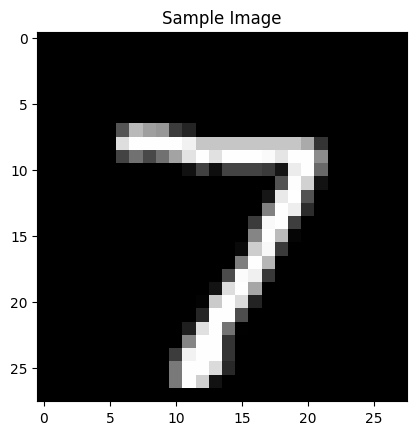

In [24]:
# Step 7: Make a prediction
img = test_images[0]
plt.imshow(img, cmap='gray')
plt.title("Sample Image")
plt.show()


In [25]:
prediction = model.predict(img.reshape(1,28,28))
print("🔮 Predicted digit:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
🔮 Predicted digit: 7


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)